In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from skimage import io, filters, morphology
from skimage.draw import polygon 
from scipy.ndimage import minimum_filter, gaussian_filter1d  # Added gaussian_filter1d import

from scipy.ndimage import generic_filter


In [8]:
image_path = 'C:/Users/ica/OneDrive - Plymouth Marine Laboratory/vscode/whitecaps/Stbd_2011_07_03_10_00_00.jpg'

In [9]:
im = io.imread(image_path).astype(np.float64)
#convert pixels into number range


In [10]:
im=im/255
im_rg = (im[:,:,0] + im[:,:,1]) / 2
im_rg.min(), im_rg.max()


(0.1803921568627451, 0.9274509803921569)

In [11]:
   
def moving_min(block):
    '''
    np.nanmin(block): Finds the minimum value in the block, ignoring NaN values
    np.ones_like(block): Creates an array of the same shape as the input, filled with ones
    Multiplies the minimum value by an array of ones, effectively creating a block where every pixel is set to the minimum value
    '''
    return np.nanmin(block) * np.ones_like(block)

In [16]:
background = ndi.minimum_filter(im_rg, size=(100, 100)) 

In [17]:
background_smoothed = filters.gaussian(background, sigma=30) #singma is amount of smoothing

# Subtract background
im_background = im_rg - background_smoothed

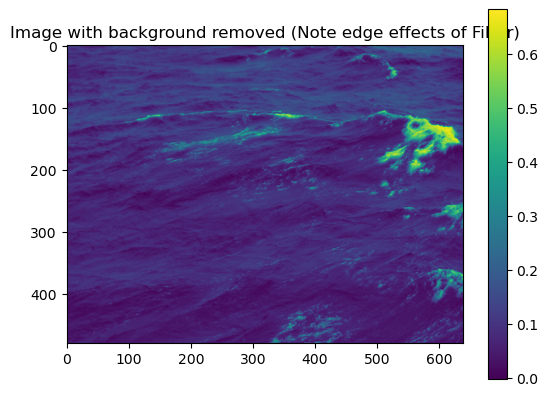

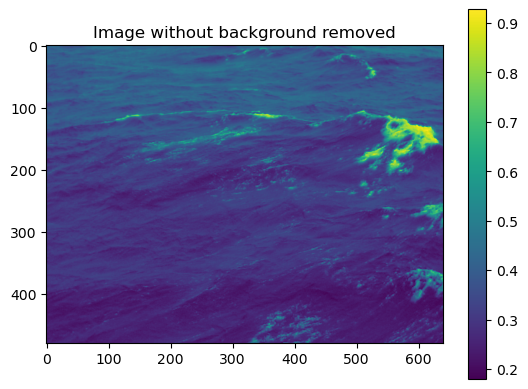

In [18]:
plt.figure(1)
plt.clf()
plt.title('Image with background removed (Note edge effects of Filter)')
plt.imshow(im_background)
plt.colorbar()

plt.figure(2)
plt.clf()
plt.title('Image without background removed')
plt.imshow(im_rg)
plt.colorbar()